<a href="https://colab.research.google.com/github/IA2021UR/entregable-2-joferne/blob/main/entregable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORTACIÓN DE LIBRERÍAS**

In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 204kB 4.9MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.vision.all import *
import os
from google.colab import files
from sklearn.model_selection import train_test_split
import shutil
from fastai.vision.widgets import ImageClassifierCleaner
import PIL

**2. CREACIÓN DEL DATASET DE IMÁGENES**

Vamos a construir el dataset de imágenes. Para ello vamos a descargarlas de Google Images. Tendremos cinco categorías, que se corresponden con modelidades de atletismo:

- Salto de longitud.

- Salto con pértiga.

- Carrera de larga distancia en pista (aire libre).

- Carrera en ruta (maratón).

- Campo a través (cross country).

La intención es construir un clasificador que distinga bien entre las diferentes modalidades.

In [ ]:
path = Path('data/athletics')

Los ficheros y fotos están subidos en Github.

In [ ]:
folder = 'longitud'
file = 'longitud.csv'
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(dest,path/file,max_pics=200)

folder = 'pertiga'
file = 'pertiga.csv'
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(dest,path/file,max_pics=200)

folder = 'pista'
file = 'pista.csv'
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(dest,path/file,max_pics=200)

folder = 'ruta'
file = 'ruta.csv'
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(dest,path/file,max_pics=200)

folder = 'xcountry'
file = 'xcountry.csv'
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(dest,path/file,max_pics=200)

Eliminamos las imágenes que no tengan un formato adecuado.

In [ ]:
for im in verify_images(get_image_files(path)):
    os.remove(str(im))

Vamos a dividir el conjunto de imágenes en train y test, y acrear las carpetas necesarias.

In [ ]:
(path/'train/longitud').mkdir(parents=True,exist_ok=True)
(path/'train/pertiga').mkdir(parents=True,exist_ok=True)
(path/'train/pista').mkdir(parents=True,exist_ok=True)
(path/'train/ruta').mkdir(parents=True,exist_ok=True)
(path/'train/xcountry').mkdir(parents=True,exist_ok=True)
(path/'test/longitud').mkdir(parents=True,exist_ok=True)
(path/'test/pertiga').mkdir(parents=True,exist_ok=True)
(path/'test/pista').mkdir(parents=True,exist_ok=True)
(path/'test/ruta').mkdir(parents=True,exist_ok=True)
(path/'test/xcountry').mkdir(parents=True,exist_ok=True)

In [ ]:
trainlongitud, testlongitud = train_test_split(get_image_files(path/'longitud'),test_size=0.2,random_state=15)
trainpertiga, testpertiga = train_test_split(get_image_files(path/'pertiga'),test_size=0.2,random_state=15)
trainpista, testpista = train_test_split(get_image_files(path/'pista'),test_size=0.2,random_state=15)
trainruta, testruta = train_test_split(get_image_files(path/'ruta'),test_size=0.2,random_state=15)
trainxcountry, testxcountry = train_test_split(get_image_files(path/'xcountry'),test_size=0.2,random_state=15)

In [ ]:
for x in trainlongitud:
  shutil.move(str(x),path/('train/longitud/'+x.name))

for x in trainpertiga:
  shutil.move(str(x),path/('train/pertiga/'+x.name))

for x in trainpista:
  shutil.move(str(x),path/('train/pista/'+x.name))

for x in trainruta:
  shutil.move(str(x),path/('train/ruta/'+x.name))

for x in trainxcountry:
  shutil.move(str(x),path/('train/xcountry/'+x.name))

for x in testlongitud:
  shutil.move(str(x),path/('test/longitud/'+x.name))

for x in testpertiga:
  shutil.move(str(x),path/('test/pertiga/'+x.name))

for x in testpista:
  shutil.move(str(x),path/('test/pista/'+x.name))

for x in testruta:
  shutil.move(str(x),path/('test/ruta/'+x.name))

for x in testxcountry:
  shutil.move(str(x),path/('test/xcountry/'+x.name))

In [ ]:
shutil.rmtree('data/athletics/longitud')
shutil.rmtree('data/athletics/pertiga')
shutil.rmtree('data/athletics/pista')
shutil.rmtree('data/athletics/ruta')
shutil.rmtree('data/athletics/xcountry')
os.remove('data/athletics/longitud.csv')
os.remove('data/athletics/pertiga.csv')
os.remove('data/athletics/pista.csv')
os.remove('data/athletics/ruta.csv')
os.remove('data/athletics/xcountry.csv')

Creamos el objeto DataBlock, y DataLoader. Construimos el modelo de predicción y entrenamos la red.

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


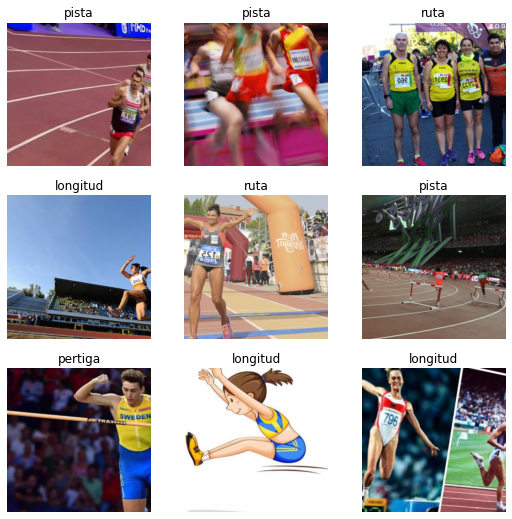

In [ ]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=aug_transforms(size=256,min_scale=0.75))

trainPath = Path('data/athletics/train')

dls = db.dataloaders(trainPath,bs=128)

dls.show_batch()

learn = cnn_learner(dls,resnet18,metrics=accuracy).to_fp16()

In [ ]:
learn.fine_tune(10,base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.442333,0.845888,0.712644,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.455913,0.857918,0.712644,00:21
1,0.414683,0.839970,0.706897,00:21
2,0.394355,0.820812,0.701149,00:21
3,0.378845,0.820362,0.706897,00:21
4,0.357614,0.817459,0.718391,00:21
5,0.340058,0.834171,0.712644,00:21
6,0.328591,0.838349,0.724138,00:21
7,0.313283,0.835208,0.706897,00:21
8,0.304029,0.830675,0.718391,00:22
9,0.300967,0.832141,0.729885,00:22


In [ ]:
learn.export()

Path().ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

Construimos la matriz de confusión.

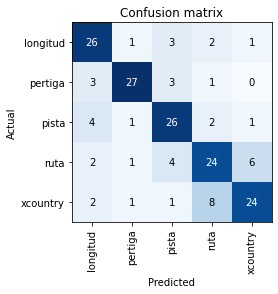

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()

Veremos más adelante que dentro del dataset hay imágenes mal etiquetadas que el modelo "predice bien", por lo tanto sería conveniente limpiarlo antes de hacer el modelo.

Evaluamos el modelo en el conjunto de test.

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dlsTest = dbTest.dataloaders(path,bs=128)

learn.dls = dlsTest

learn.validate()

(#2) [0.8321414589881897,0.7298850417137146]

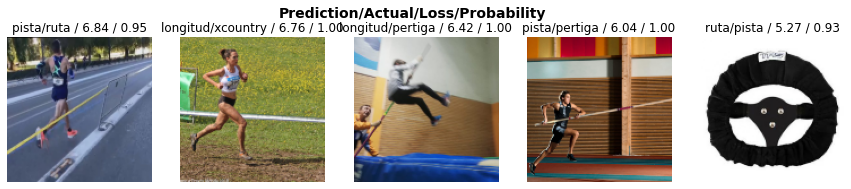

In [ ]:
interp.plot_top_losses(5,nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

Probamos el modelo con imágenes externas a ver si las clasifica bien.

In [ ]:
learn.export()

!ls data/athletics

defaults.device = torch.device('cpu')

test  train


Maratón de Tokio: una de las 6 Majors del maratón mundial, pertenece a la categoría 'ruta'.

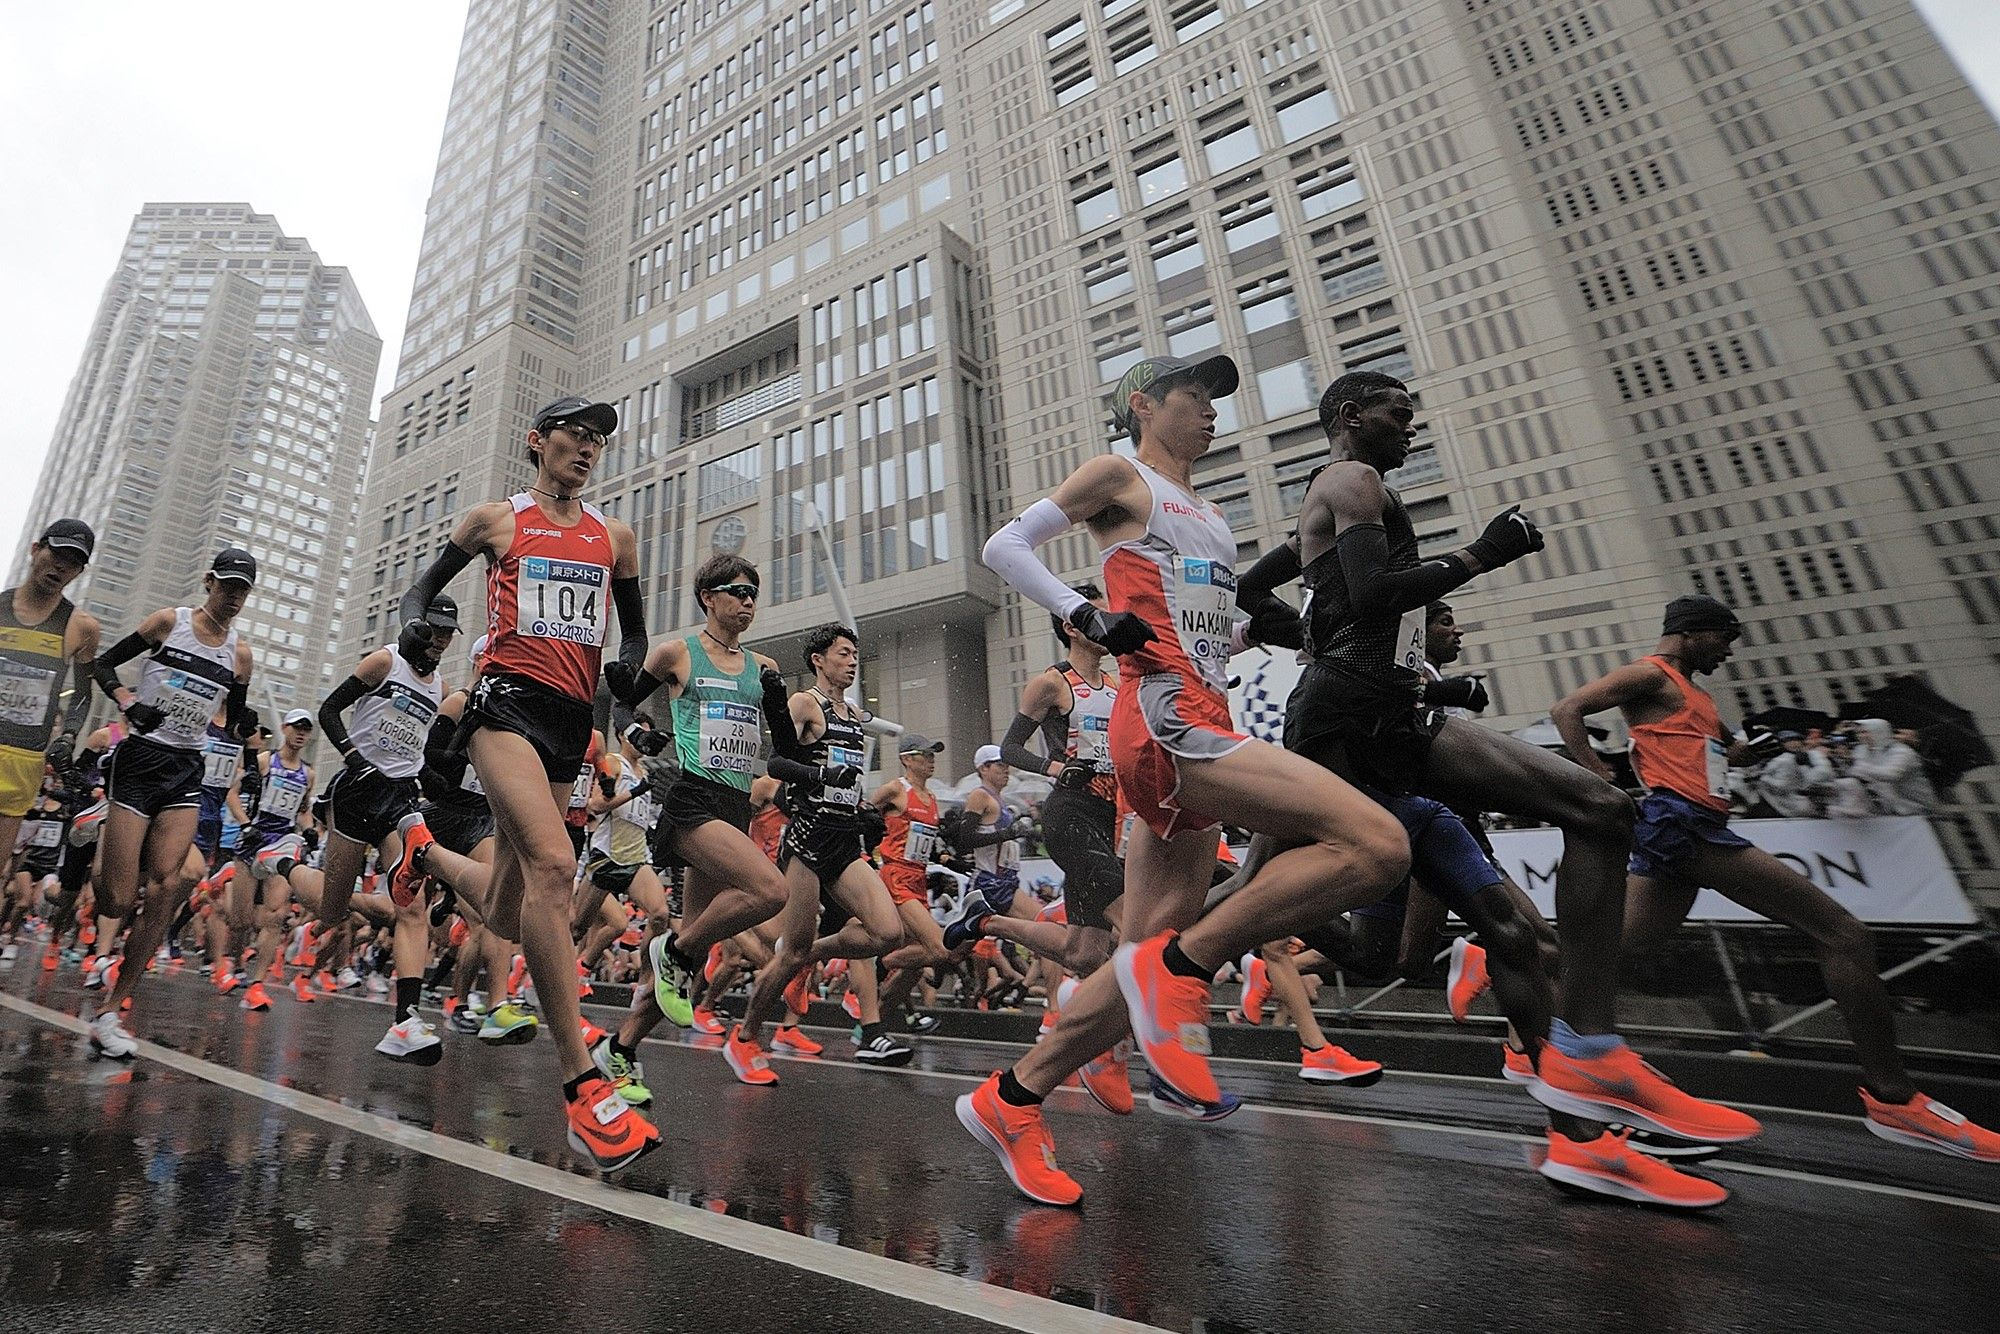

In [ ]:
img = PILImage.create('tokio.jpg')
img

learn_inf = load_learner('export.pkl')

pred_class,pred_idx,outputs=learn_inf.predict(img)
pred_class

'ruta'

Mohammed Farah tras vencer los 10.000m de los Juegos Olímpicos de Río de Janeiro. Pertenece a la categoría 'pista'.

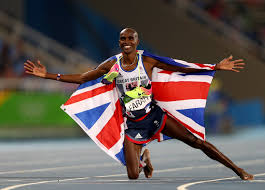

In [ ]:
img = PILImage.create('mo.jpg')
img

learn_inf = load_learner('export.pkl')

pred_class,pred_idx,outputs=learn_inf.predict(img)
pred_class

'longitud'

Renaud Lavillenie: explusmarquista mundial de salto con pértiga, hasta que se lo arrebató en 2020 Armand Duplantis. Pertenece a la categoría 'pértiga'.

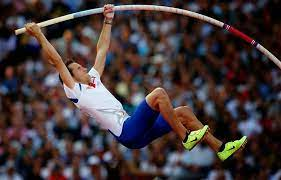

In [ ]:
img = PILImage.create('renoud.jpg')
img

learn_inf = load_learner('export.pkl')

pred_class,pred_idx,outputs=learn_inf.predict(img)
pred_class

'pertiga'

Cross de Elgóibar: élite africana de la edición de 2019, uno de los crosses mas conocidos de España y del mundo. Pertenece a la categoría 'xcountry'.

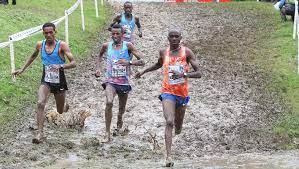

In [ ]:
img = PILImage.create('elgoibar.jpg')
img

learn_inf = load_learner('export.pkl')

pred_class,pred_idx,outputs=learn_inf.predict(img)
pred_class

'xcountry'

Ana Peleteiro: saltadora de longitud española, subcampeona de Europa en pista cubierta en 2020. Pertenece a la categoría 'longitud', aunque ella es saltadora de triple (pero no he introducido esta modalidad en el trabajo, y a parte, sería francamente complicado diferenciarla de longitud, por no decir que casi imposible).

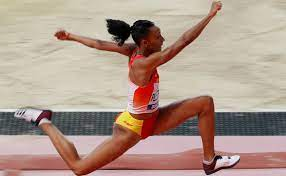

In [ ]:
img = PILImage.create('anapel.jpg')
img

learn_inf = load_learner('export.pkl')

pred_class,pred_idx,outputs=learn_inf.predict(img)
pred_class

'longitud'

NOTA: me da mucha rabia que sé que esta parte de la asignatura no he podido hacer prácticamente nada adicional, y voy muy justo en lo obligatorio. Pero estas semanas han sido especialmente cargadas, y tengo dos asignaturas obligatorias de Matemáticas a las que tengo que dar prioridad. Dicho esto me ha encantado el deep learning, y trataré de profundizar en verano con más tranquilidad.